In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats #stats : 통계 분석 패키지
from scipy.stats import iqr

In [28]:
sns.set_theme(style="darkgrid")
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False # minus 인식


### 1.1 데이터 확인


In [29]:
# 데이터 프레임으로 저장

eda_df = pd.read_csv("./data/01_1.EDA.csv", encoding = 'cp949')
eda_df.head(10)

,id,성별,분반,학년,몸무게,출석,중간,기말
0,1,남자,1,1,40,100,87,80
1,2,여자,2,2,50,100,83,60
2,3,남자,1,3,56,100,84,60
3,4,여자,2,4,51,100,73,60
4,5,남자,1,1,55,100,68,60
5,6,남자,2,2,61,100,77,50
6,7,여자,1,3,69,100,40,80
7,8,여자,2,2,44,100,73,30
8,9,여자,1,2,66,80,64,40
9,10,남자,2,2,60,100,66,40


In [30]:
# 자료구조 살펴보기
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      102 non-null    int64 
 1   성별      102 non-null    object
 2   분반      102 non-null    int64 
 3   학년      102 non-null    int64 
 4   몸무게     102 non-null    int64 
 5   출석      102 non-null    int64 
 6   중간      102 non-null    int64 
 7   기말      102 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 6.5+ KB


In [31]:
# 
eda_df['분반'].replace({1:'A반', 2:'B반'}, inplace = True)
eda_df['학년'].replace({1:'1학년', 2:'2학년', 3:'3학년', 4:'4학년'}, inplace = True)

eda_df.head()

C:\Users\SikBread\AppData\Local\Temp\ipykernel_15136\1944849868.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  eda_df['분반'].replace({1:'A반', 2:'B반'}, inplace = True)
C:\Users\SikBread\AppData\Local\Temp\ipykernel_15136\1944849868.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

,id,성별,분반,학년,몸무게,출석,중간,기말
0,1,남자,A반,1학년,40,100,87,80
1,2,여자,B반,2학년,50,100,83,60
2,3,남자,A반,3학년,56,100,84,60
3,4,여자,B반,4학년,51,100,73,60
4,5,남자,A반,1학년,55,100,68,60


In [32]:
# datatype을 category로 변경

ead_df['성별'] = eda_df['성별'].astype('category')
ead_df['분반'] = eda_df['분반'].astype('category')
ead_df['학'] = eda_df['학'].astype('category')

NameError: name 'ead_df' is not defined

### 1.2 다변형 변수 (1)

#### 1) 도수분포표

In [ ]:
# value_count

eda_df['성별'].value_counts()

성별
남자    54
여자    48
Name: count, dtype: int64

In [ ]:
freq_table = pd.DataFrame(eda_df['성별'].value_counts())
freq_table.columns = ['count']
freq_table

,count
성별,
남자,54
여자,48


In [ ]:
# crosstab 이용

freq_table1 = pd.crosstab(index = eda_df['성별'],
                          columns= ['count'])
freq_table1

col_0,count
성별,
남자,54
여자,48


In [ ]:
freq_table1['prop'] = np.round(freq_table1['count']/sum(freq_table1['count']), 2)
freq_table1

col_0,count,prop
성별,,
남자,54,0.53
여자,48,0.47


In [ ]:
# 누적 비율
freq_table1['cum prop'] = np.cumsum(freq_table1['prop'])
freq_table1

col_0,count,prop,cum prop
성별,,,
남자,54,0.53,0.53
여자,48,0.47,1.00


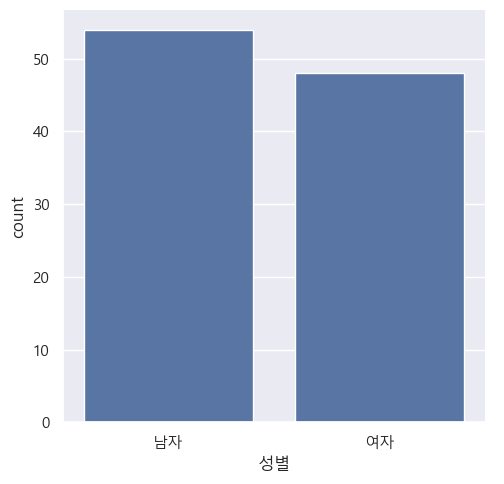

In [ ]:
# 막대 그래프
sns.catplot(x = '성별',
            kind = 'count',
            data = eda_df)  
plt.show()

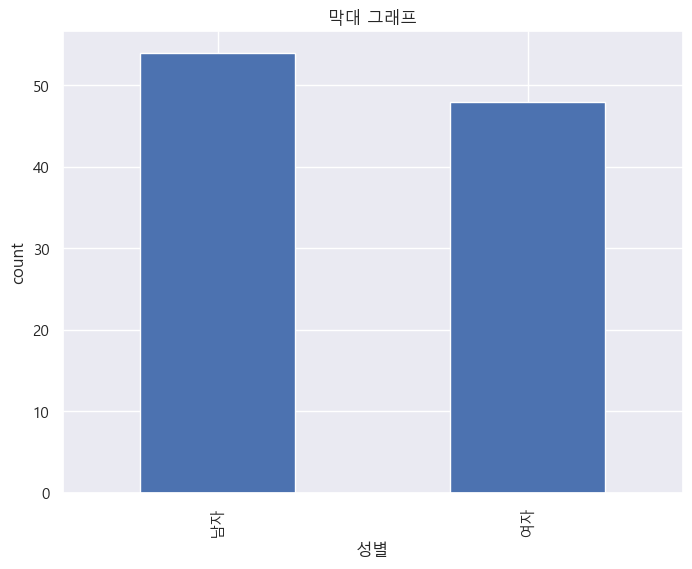

In [ ]:
# 막대 그래프 (pd_plot)
ax = freq_table1['count'].plot(figsize=(8,6),
                               kind = 'bar')
ax.set(title = '막대 그래프',
       xlabel = '성별',
       ylabel = 'count')
plt.show()

### 1.3 범주형 변수 (다변) 처리

#### 1) 분할표


In [ ]:
# 두 변수 모두 범주형일 때
cross_table = pd.crosstab(index = eda_df['성별'],
                          columns = eda_df['분반'],
                          margins = True)
cross_table

분반,A반,B반,All
성별,,,
남자,21,33,54
여자,31,17,48
All,52,50,102


In [ ]:
# 정리
cross_table.index = ['남성', '여성', '열 전체']
cross_table.columns = ['A반', 'B반', '행 전체']
cross_table

,A반,B반,행 전체
남성,21,33,54
여성,31,17,48
열 전체,52,50,102


In [ ]:
# 전체 비율
cross_table/cross_table.loc["열 전체", "행 전체"]

,A반,B반,행 전체
남성,0.205882,0.323529,0.529412
여성,0.303922,0.166667,0.470588
열 전체,0.509804,0.490196,1.000000


In [ ]:
# 열 비율
cross_table/cross_table.loc["열 전체"]

,A반,B반,행 전체
남성,0.403846,0.66,0.529412
여성,0.596154,0.34,0.470588
열 전체,1.000000,1.00,1.000000


In [ ]:
# 행 비율
cross_table.div(cross_table["행 전체"], axis = 0)

,A반,B반,행 전체
남성,0.388889,0.611111,1.0
여성,0.645833,0.354167,1.0
열 전체,0.509804,0.490196,1.0


In [ ]:
# 전체 비율 저장
cross_prop = cross_table/cross_table.loc["열 전체", "행 전체"]
cross_prop

,A반,B반,행 전체
남성,0.205882,0.323529,0.529412
여성,0.303922,0.166667,0.470588
열 전체,0.509804,0.490196,1.000000


### 그래프 그리기

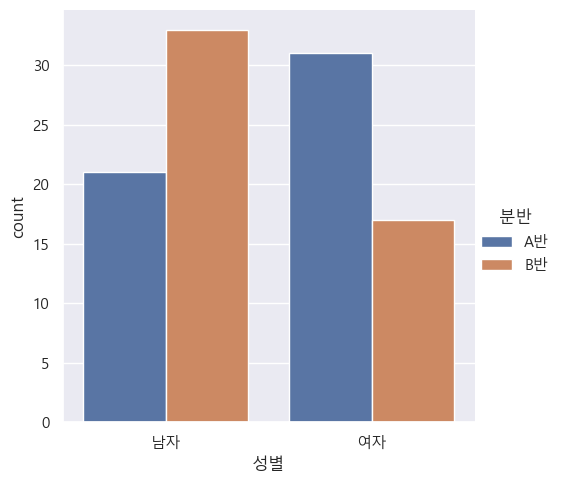

In [ ]:
# 누적 막대 그래프
sns.catplot(x = '성별',
            hue = '분반',
            kind = 'count',
            data = eda_df)
plt.show()

# 2. 수치형 자료 분석

### 2.1. 데이터 불러오기

In [ ]:
eda_df.head()

,id,성별,분반,학년,몸무게,출석,중간,기말
0,1,남자,1,1,40,100,87,80
1,2,여자,2,2,50,100,83,60
2,3,남자,1,3,56,100,84,60
3,4,여자,2,4,51,100,73,60
4,5,남자,1,1,55,100,68,60


In [ ]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      102 non-null    int64 
 1   성별      102 non-null    object
 2   분반      102 non-null    int64 
 3   학년      102 non-null    int64 
 4   몸무게     102 non-null    int64 
 5   출석      102 non-null    int64 
 6   중간      102 non-null    int64 
 7   기말      102 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 6.5+ KB


In [ ]:
# 범주형 변수의 가변수를 문자열로 처리
eda_df['분반'].replace({1:'A반', 2:'B반'}, inplace = True)
eda_df['학년'].replace({1:'1학년', 2:'2학년', 3:'3학년', 4:'4학년'})

C:\Users\SikBread\AppData\Local\Temp\ipykernel_15136\191320218.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  eda_df['분반'].replace({1:'A반', 2:'B반'}, inplace = True)


0      1학년
1      2학년
2      3학년
3      4학년
4      1학년
      ... 
97     3학년
98     2학년
99     2학년
100    2학년
101    2학년
Name: 학년, Length: 102, dtype: object

In [ ]:
# 데이터 타입을 category 로 변경
eda_df['성별'] = eda_df['성별'].astype('category')
eda_df['분반'] = eda_df['분반'].astype('category')
eda_df['학년'] = eda_df['학년'].astype('category')

### 2.2. 수치형 변수 (1개)

In [ ]:
# 기술 통계
print(eda_df.몸무게.count())
print(eda_df.몸무게.mean()) # 평균
print(eda_df.몸무게.std()) # 표준 편차
print(eda_df.몸무게.max())
print(eda_df.몸무게.min())
print(eda_df.몸무게.quantile(0.25)) # 사분위수
print(eda_df.몸무게.quantile(0.45))
print(eda_df.몸무게.quantile(0.50))
print(eda_df.몸무게.quantile(0.75))
print(eda_df.몸무게.median()) # 중앙
print(eda_df.몸무게.mode().values[0]) # 최빈값
print(eda_df.몸무게.skew()) # 왜도
print(eda_df.몸무게.kurtosis()) # 첨도

102
57.72549019607843
9.74339772678295
120
40
52.0
56.0
57.0
61.0
57.0
56
2.859762999904391
16.388423380051602


In [ ]:
weight_df = pd.DataFrame(eda_df.몸무게.describe()).T
weight_df

,count,mean,std,min,25%,50%,75%,max
몸무게,102.0,57.72549,9.743398,40.0,52.0,57.0,61.0,120.0


In [ ]:
weight_df['skew'] = eda_df.몸무게.skew()
weight_df['kurtosis'] = eda_df.몸무게.kurtosis()
weight_df

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
몸무게,102.0,57.72549,9.743398,40.0,52.0,57.0,61.0,120.0,2.859763,16.388423


In [ ]:
eda_df.agg({"몸무게":['count', 'mean', 'std', 'min']}).T

,count,mean,std,min
몸무게,102.0,57.72549,9.743398,40.0


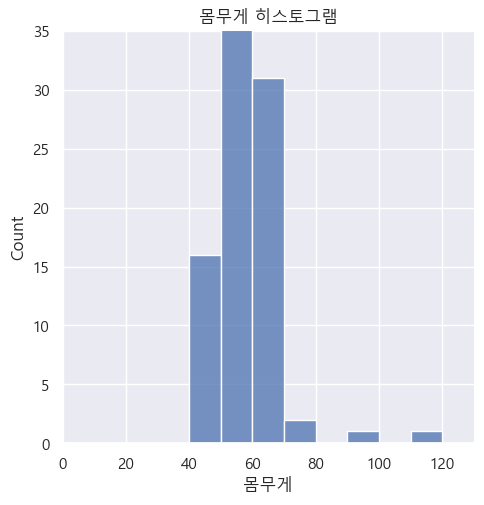

In [ ]:
# 그래프 그리기
g = sns.displot(data = eda_df,
                x = '몸무게',
                binwidth = 10,
                kind = 'hist' 
                )
g.set(title = '몸무게 히스토그램',
      xlim = (0,130),
      ylim = (0,35))

plt.show()

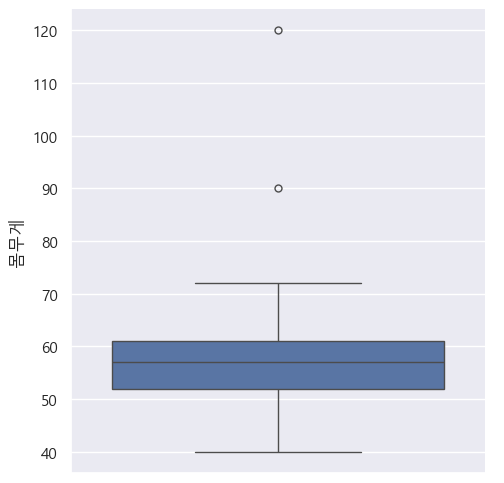

In [33]:
sns.catplot(data = eda_df,
            y = '몸무게',
            kind = 'box')
plt.show()

In [34]:
filter = eda_df['몸무게'] >= 80
eda_df.loc[filter]

,id,성별,분반,학년,몸무게,출석,중간,기말
100,101,남자,B반,2학년,90,90,54,10
101,102,여자,A반,2학년,120,100,49,40


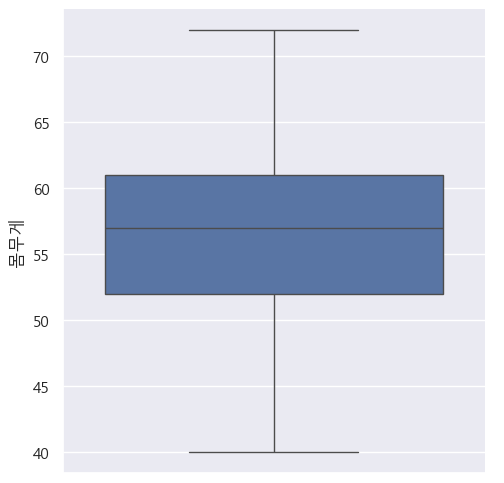

In [35]:
# 이상치 제거
eda_df.drop(eda_df[filter].index, inplace = True)

sns.catplot(data = eda_df,
            y = '몸무게',
            kind = 'box')
plt.show()

### 2.3. 수치형 + 범주형

In [36]:
# 1. 범위 확인
pd.cut(x = eda_df['몸무게'], bins = 7)\
    .value_counts()

몸무게
(53.714, 58.286]    28
(58.286, 62.857]    23
(49.143, 53.714]    16
(44.571, 49.143]    13
(62.857, 67.429]     9
(67.429, 72.0]       8
(39.968, 44.571]     3
Name: count, dtype: int64

In [38]:
bins = [0,45,50,55,60,65,70,100]
label = ['~45 미만', '45~50', '50~55', '55~60', '60~65', '65~70', '70~100']
eda_df['weight_bin'] = pd.cut(x = eda_df['몸무게'],
                              bins = bins,
                              labels = label,
                              right = False) # [ 이상 ~ 미만 )

eda_df.head(10)

,id,성별,분반,학년,몸무게,출석,중간,기말,weight_bin
0,1,남자,A반,1학년,40,100,87,80,~45 미만
1,2,여자,B반,2학년,50,100,83,60,50~55
2,3,남자,A반,3학년,56,100,84,60,55~60
3,4,여자,B반,4학년,51,100,73,60,50~55
4,5,남자,A반,1학년,55,100,68,60,55~60
5,6,남자,B반,2학년,61,100,77,50,60~65
6,7,여자,A반,3학년,69,100,40,80,65~70
7,8,여자,B반,2학년,44,100,73,30,~45 미만
8,9,여자,A반,2학년,66,80,64,40,65~70
9,10,남자,B반,2학년,60,100,66,40,60~65


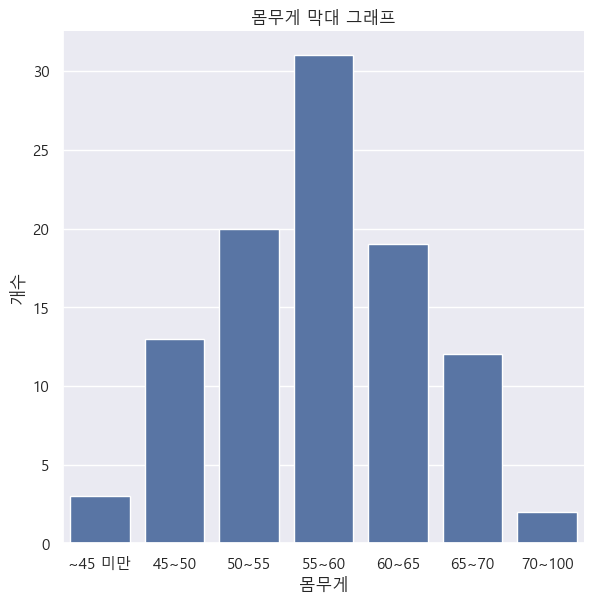

In [40]:
g = sns.catplot(data = eda_df,
                x = 'weight_bin',
                kind = 'count',
                height = 6)
g.set(title = '몸무게 막대 그래프',
      xlabel = '몸무게',
      ylabel = '개수')
plt.show()

### 2.4. 수치형 1개 + 범주형 1개

In [44]:
# 그룹별 분석
eda_df.groupby('성별')['몸무게'].mean().round(2)

성별
남자    57.04
여자    56.49
Name: 몸무게, dtype: float64

In [45]:
eda_df.groupby('성별')['몸무게'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
성별,,,,,,,,
남자,53.0,57.04,6.58,40.0,53.0,57.0,61.0,71.0
여자,47.0,56.49,7.10,44.0,51.0,57.0,60.5,72.0


In [46]:
eda_df.groupby('성별')\
    .agg({'몸무게':['count', 'mean']}).round(2)

몸무게       
   count   mean
성별             
남자    53  57.04
여자    47  56.49

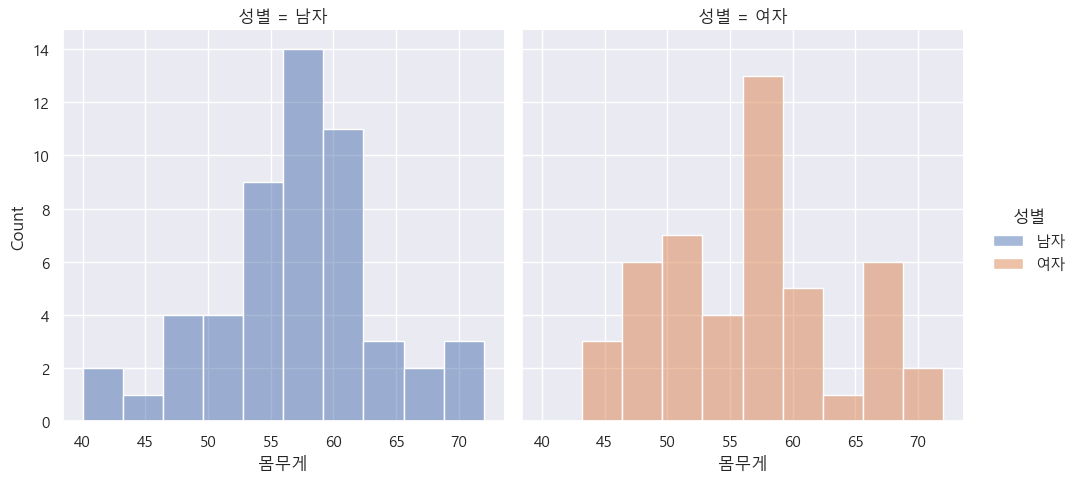

In [48]:
sns.displot(data = eda_df,
            x = '몸무게',
            bins = 10,
            hue = '성별',
            col = '성별',
            kind = 'hist')

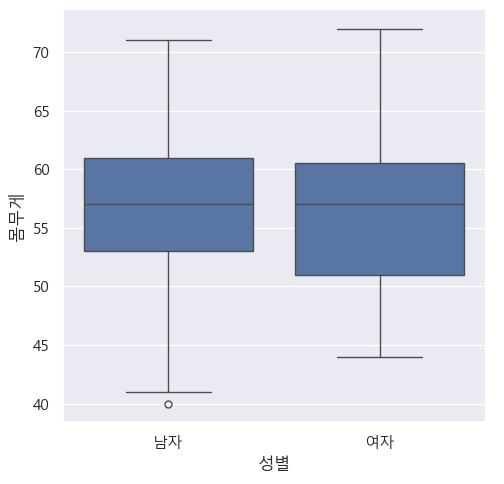

In [49]:
sns.catplot(data = eda_df,
            x = "성별",
            y = "몸무게",
            kind = 'box')

### 2.5. 다중 수치형 변수

In [54]:
eda_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,100.0,50.50,29.01,1.0,25.75,50.5,75.25,100.0
몸무게,100.0,56.78,6.80,40.0,52.00,57.0,61.00,72.0
출석,100.0,95.40,10.29,60.0,100.00,100.0,100.00,100.0
중간,100.0,55.71,19.69,5.0,44.00,58.0,71.00,92.0
기말,100.0,36.50,26.98,10.0,10.00,30.0,56.25,100.0


In [57]:
# 범주형 포함

eda_df.describe(include = 'all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,100.0,NaN,NaN,NaN,50.5,29.01,1.0,25.75,50.5,75.25,100.0
성별,100,2,남자,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
분반,100,2,A반,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
학년,100,4,2학년,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
몸무게,100.0,NaN,NaN,NaN,56.78,6.8,40.0,52.0,57.0,61.0,72.0
출석,100.0,NaN,NaN,NaN,95.4,10.29,60.0,100.0,100.0,100.0,100.0
중간,100.0,NaN,NaN,NaN,55.71,19.69,5.0,44.0,58.0,71.0,92.0
기말,100.0,NaN,NaN,NaN,36.5,26.98,10.0,10.0,30.0,56.25,100.0
weight_bin,100,7,55~60,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# 필요한 변수만 선택
eda_df.columns

Index(['id', '성별', '분반', '학년', '몸무게', '출석', '중간', '기말', 'weight_bin'], dtype='object')

In [59]:
num_feature = ['몸무게', '출석', '중간', '기말']
eda_df[num_feature].describe().T.round()

,count,mean,std,min,25%,50%,75%,max
몸무게,100.0,57.0,7.0,40.0,52.0,57.0,61.0,72.0
출석,100.0,95.0,10.0,60.0,100.0,100.0,100.0,100.0
중간,100.0,56.0,20.0,5.0,44.0,58.0,71.0,92.0
기말,100.0,36.0,27.0,10.0,10.0,30.0,56.0,100.0


In [60]:
for num in num_feature:
    print("---", num, "---")
    results = eda_df.groupby('성별')[num].describe().round(2)
    print(results, "\n")


--- 몸무게 ---
    count   mean   std   min   25%   50%   75%   max
성별                                                  
남자   53.0  57.04  6.58  40.0  53.0  57.0  61.0  71.0
여자   47.0  56.49  7.10  44.0  51.0  57.0  60.5  72.0 

--- 출석 ---
    count   mean    std   min    25%    50%    75%    max
성별                                                       
남자   53.0  96.23   8.82  60.0  100.0  100.0  100.0  100.0
여자   47.0  94.47  11.76  60.0  100.0  100.0  100.0  100.0 

--- 중간 ---
    count   mean    std   min   25%   50%   75%   max
성별                                                   
남자   53.0  53.17  19.31   5.0  45.0  53.0  67.0  87.0
여자   47.0  58.57  19.93  10.0  43.5  62.0  73.0  92.0 

--- 기말 ---
    count   mean    std   min   25%   50%   75%    max
성별                                                    
남자   53.0  35.94  26.80  10.0  10.0  30.0  50.0  100.0
여자   47.0  37.13  27.46  10.0  10.0  30.0  60.0  100.0 



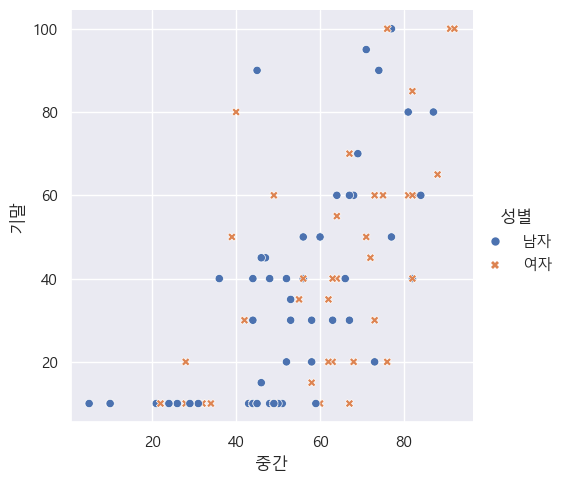

In [61]:
sns.relplot(data = eda_df,
            x = '중간',
            y = '기말',
            hue = '성별',
            style = '성별')

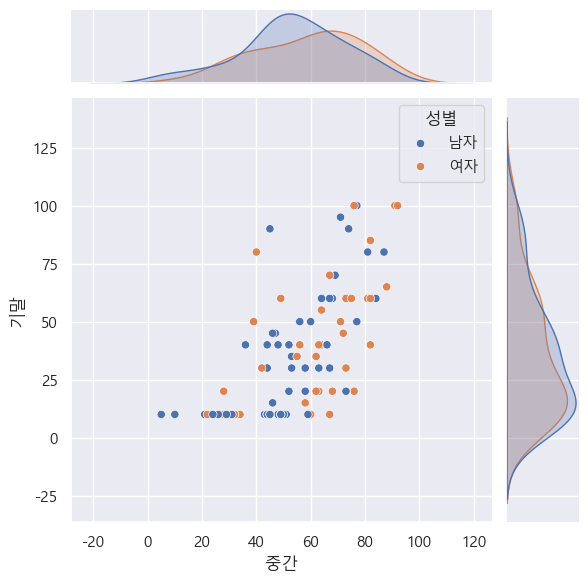

In [63]:
sns.jointplot(data = eda_df,
            x = '중간',
            y = '기말',
            hue = '성별',
            )

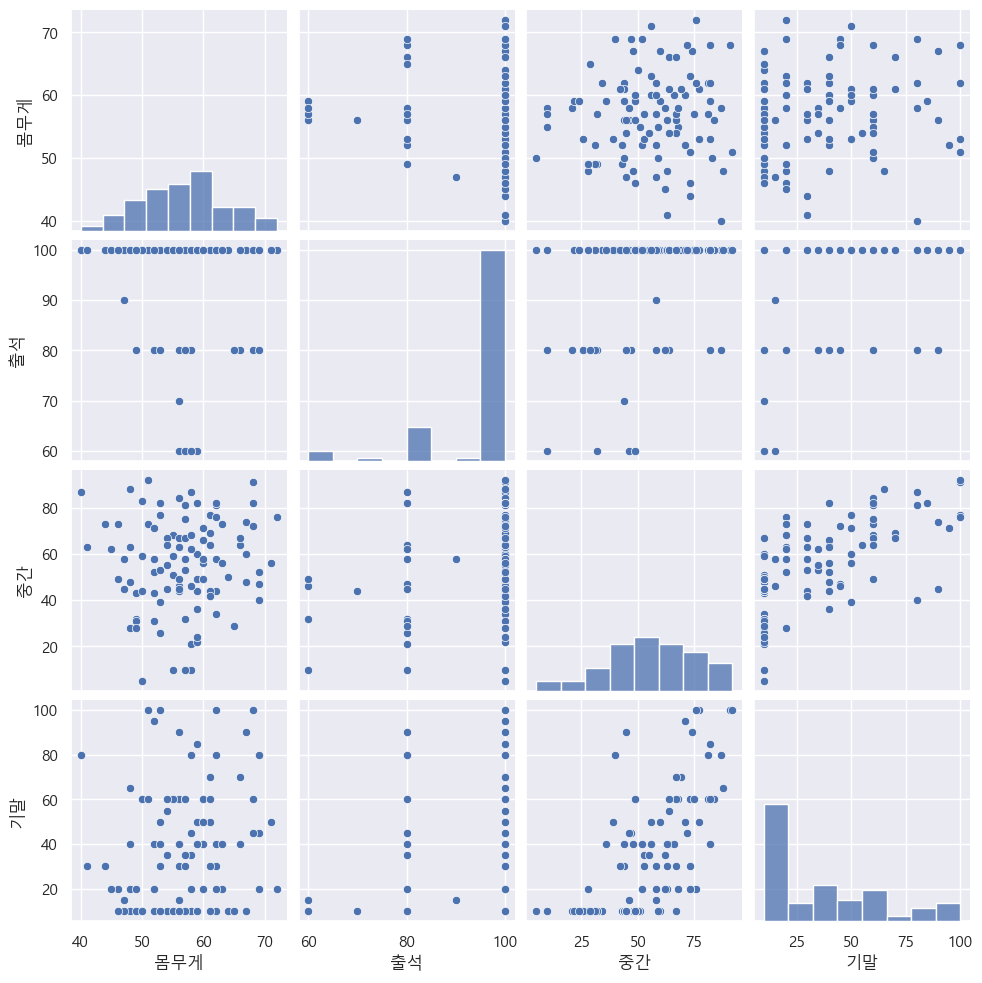

In [64]:
# sns.pairplot(vars = num_feature,
#              data = eda_df)

### 2.7 평균


In [65]:
# 가중 평균
wa = [(10,60), (50,70), (40, 80)]
sum = 0
n = 0

for i,j in wa:
    sum = sum+(i*j)
    

In [67]:
eda_df['score'] = 0.2 * eda_df['출석'] + 0.3 * eda_df['중간'] + 0.5 * eda_df['기말']
eda_df.head()

,id,성별,분반,학년,몸무게,출석,중간,기말,weight_bin,score
0,1,남자,A반,1학년,40,100,87,80,~45 미만,86.1
1,2,여자,B반,2학년,50,100,83,60,50~55,74.9
2,3,남자,A반,3학년,56,100,84,60,55~60,75.2
3,4,여자,B반,4학년,51,100,73,60,50~55,71.9
4,5,남자,A반,1학년,55,100,68,60,55~60,70.4


In [68]:
eda_df['score'].mean()

54.043

In [70]:
# 기하 평균 : 비율, 성장율, 이자율 (곱하기를 이용해서 평균을 낼 때)

import statistics as st
cagr = [998/635, 1265/998, 1701/1265, 2363/1701]
st.geometric_mean(cagr)-1

0.3889048648162128